In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [3]:
product_descriptions = pd.read_csv(r'D:\INT 423 Project\product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [4]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [5]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

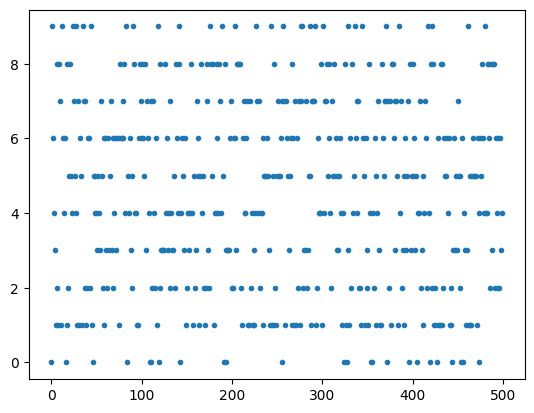

In [7]:

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [8]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [9]:
from sklearn.cluster import KMeans

true_k = 10


model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

terms = vectorizer.get_feature_names_out() 

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

def print_cluster(cluster_num):
    print(f"Cluster {cluster_num}:")
    for ind in order_centroids[cluster_num, :10]:  
        print(f" {terms[ind]}")
    print()  

print("Top terms per cluster:")
for i in range(true_k):
    print_cluster(i)


Top terms per cluster:
Cluster 0:
 power
 air
 light
 volt
 led
 cooling
 watt
 plan
 protection
 battery

Cluster 1:
 oven
 cycle
 cu
 cooking
 capacity
 easy
 wash
 control
 ft
 ice

Cluster 2:
 water
 heater
 easy
 use
 duty
 handle
 tank
 heavy
 filter
 spray

Cluster 3:
 metal
 sheet
 steel
 use
 used
 cut
 cutting
 roof
 tooth
 drill

Cluster 4:
 wood
 door
 paint
 flush
 natural
 toilet
 water
 doors
 easy
 design

Cluster 5:
 insulation
 fiberglass
 reinforced
 attic
 radiant
 ft
 cover
 white
 ecotouch
 finished

Cluster 6:
 storage
 shelves
 easy
 cabinet
 lbs
 nickel
 finish
 hardware
 adjustable
 room

Cluster 7:
 post
 frame
 patio
 aluminum
 screen
 posts
 window
 fence
 steel
 dining

Cluster 8:
 ft
 base
 painted
 help
 used
 primed
 proposition
 nbsp
 residents
 moulding

Cluster 9:
 wall
 use
 piece
 color
 design
 tile
 home
 snow
 finish
 easy



def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

show_recommendations("furniture")

In [12]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(X1, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.3f}")


print(f"Inertia: {kmeans.inertia_:.3f}")


Silhouette Score: 0.005
Inertia: 471.332


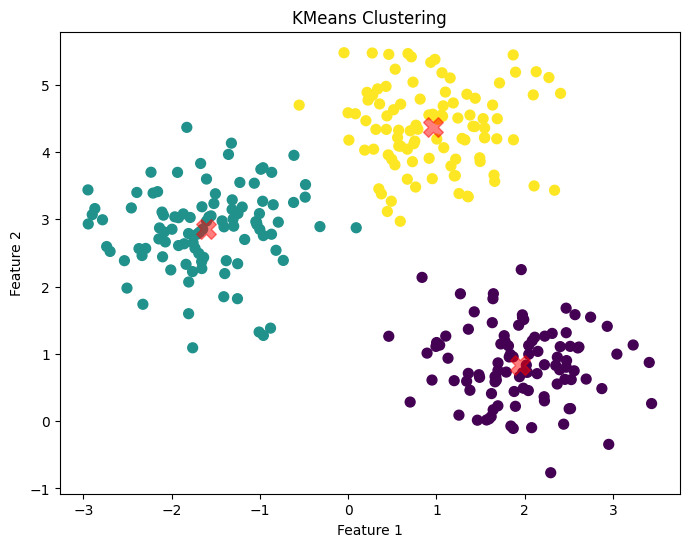

Cluster Centers:
 [[ 1.95159369  0.83467497]
 [-1.60811992  2.85881658]
 [ 0.95625704  4.37226546]]
Inertia:  212.35550348922897


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)


kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


centers = kmeans.cluster_centers_

labels = kmeans.labels_


inertia = kmeans.inertia_


plt.figure(figsize=(8, 6))


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)


plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


print("Cluster Centers:\n", centers)
print("Inertia: ", inertia)


In [14]:
show_recommendations("Aluminum")

Cluster 7:
 post
 frame
 patio
 aluminum
 screen
 posts
 window
 fence
 steel
 dining



In [15]:
show_recommendations("oil")

Cluster 9:
 wall
 use
 piece
 color
 design
 tile
 home
 snow
 finish
 easy

